## Capstone Stock Market Analysis Project - Part II

This capstone project is part of a Python course for Financial Analysis taught by Jose Portilla. As a Financial Analyst professional and Python enthusiast, I highly recommend this program.

Here is the access to further information about the course and its instructor:
- [Course: Python for Financial Analysis and Algorithmic Trading](https://www.udemy.com/course/python-for-finance-and-trading-algorithms/)
- [Instructor: Jose Portilla](https://www.udemy.com/course/python-for-finance-and-trading-algorithms/#instructor-1)

This is the second part of the study comparing Tesla, Ford and GM stock performance.

---

*Import the various libraries you will need-you can always just come back up here or import as you go along.*

In [94]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 8]
from datetime import date, timedelta, datetime
from pandas.plotting import scatter_matrix

import quantstats as qs
qs.extend_pandas()

from prettytable import PrettyTable

import warnings 
warnings.filterwarnings('ignore')
import emoji

---

#### III) Basic Financial Analysis

*Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!*

*Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method.*

In [95]:
# Extracting all price columns (OHLC) of Tesla Stock (TSLA) from Yahoo Finance API

d1 = date.today() - timedelta(days = 1)
last = d1.strftime("%Y/%m/%d") # Estabelecendo a data final móvel (ontem)

tsla = wb.DataReader('TSLA', data_source = 'yahoo', start = '2012-01-01', end = last)

tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450


If two options are provided, it is appropriate to test which one is more time-efficient. Therefore, both methods of calculating daily percentage prices (pct_change and shift) will be tested. 

In [109]:
start_time = datetime.now()

tsla['returns'] = tsla['Close'].pct_change(1)

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.000959


In [110]:
start_time = datetime.now()

tsla['returns'] = (tsla['Close'] / tsla['Close'].shift(1) ) - 1

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.002775


The difference might be almost irrelevant, but it helps to decide which method will be used. In this case, pct_change will be applied to the dataframe of each company.

In [98]:
tsla['returns'] = tsla['Close'].pct_change(1)
tsla['returns'].iloc[0] = 0 # Changing the NaN of the first row into 0

tsla.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616,0.000000
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450,0.012635


In [99]:
# Ford
ford = wb.DataReader('F', data_source = 'yahoo', start = '2012-01-01', end = last)

ford['returns'] = ford['Close'].pct_change(1)
ford['returns'].iloc[0] = 0

ford.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.506941,0.000000
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.621602,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.817202,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.898136,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.958840,0.007686


In [100]:
# Finally, General Motos (GM)
gm = wb.DataReader('GM', data_source = 'yahoo', start = '2012-01-01', end = last)

gm['returns'] = gm['Close'].pct_change(1)
gm['returns'].iloc[0] = 0                   
                   
gm.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,0.000000
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346701,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135059,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714724,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,-0.003490


---

*Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"?*

In [101]:
# Establishing colors that will be presented for each stock according to the brand

tesla_color = '#e82127'
ford_color = '#5c93cc'
gm_color = 'gray' # Different from Part I aiming to properly separate Ford and GM visual data 

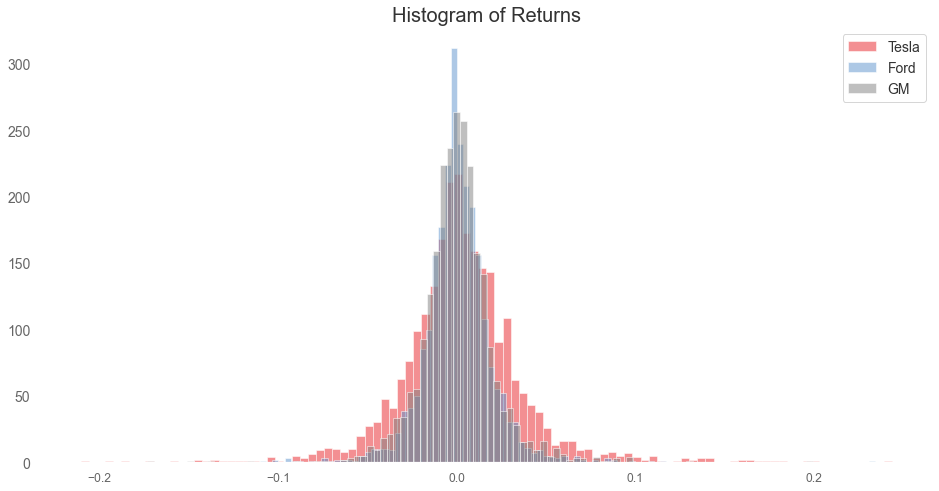

In [102]:
# Stacked histogram of return distributions for each stock
tsla['returns'].hist(bins = 100, label = 'Tesla', alpha = 0.5, color = tesla_color)
ford['returns'].hist(bins = 100, label = 'Ford', alpha = 0.5, color = ford_color)
gm['returns'].hist(bins = 100, label = 'GM', alpha = 0.5, color = gm_color)

plt.title('Histogram of Returns', size = 20)
plt.legend(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(False)

plt.show()

Tesla has a wider plot, indicating higher dispersion of results around the mean. Ford and GM returns are more centered around the average of the values, which also means that both stock's returns have **fatter tails**.

The idea is that extreme results in Ford or GM have more weight. This concept could be assessed by the **Kurtosis**, which is a measure of the "tailedness" of a distribution.

The actual result provided by the function kurt() is the excess kurtosis, which can assume the following profiles:
- Mesokurtic (Kurtosis = 0): normal distribution;
- Leptokurtic (Kurtosis > 0): fat tails
- Platykurtic (Kurtosis < 0): thin tails

In [103]:
# Calculating Kurtosis for each stock

tsla_kurt = round(tsla['returns'].kurt(), 2)
ford_kurt = round(ford['returns'].kurt(), 2)
gm_kurt = round(gm['returns'].kurt(), 2)

print(" Tesla Kurtosis: {}".format(tsla_kurt), '\n',
     "Ford Kurtosis: {}".format(ford_kurt), '\n',
     "GM Kurtosis: {}".format(gm_kurt), '\n')

 Tesla Kurtosis: 6.16 
 Ford Kurtosis: 12.74 
 GM Kurtosis: 9.95 



Tesla's characteristic of wider-spread results makes its tails "thinner", i.e extreme events on its stock prices have a lower valence when compared to Ford and GM. 

Kurtosis is just one perspective of the multifaceted risk assessment. Tesla's stocks have, indeed, higher dispersion (variance and standard deviation) but Ford and GM have fatter tails and, therefore, higher tail risk (losses due to rare events).  

---

*Try also creating some box plots comparing the returns.*

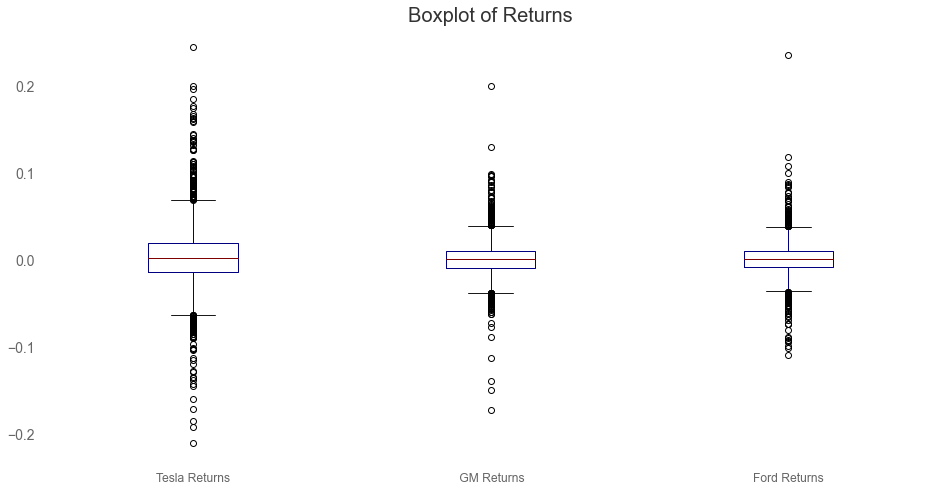

In [104]:
box_df = pd.concat([tsla['returns'], gm['returns'], ford['returns']], axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',colormap='jet')

plt.title('Boxplot of Returns', size = 20)
plt.yticks(fontsize = 14)
plt.grid(False)

plt.show()

---

*Create a cumulative daily return column for each car company's dataframe.*

In [105]:
tsla['Cumulative Return'] = (1 + tsla['returns']).cumprod()
tsla['Cumulative Return'].iloc[0] = 0

tsla.head()

,High,Low,Open,Close,Volume,Adj Close,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500.0,5.616,0.000000,0.000000
2012-01-04,5.734,5.500,5.642,5.542,3150500.0,5.542,-0.013177,0.986823
2012-01-05,5.586,5.370,5.552,5.424,5027500.0,5.424,-0.021292,0.965812
2012-01-06,5.558,5.282,5.440,5.382,4931500.0,5.382,-0.007743,0.958333
2012-01-09,5.498,5.224,5.400,5.450,4485000.0,5.450,0.012635,0.970442


In [106]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
ford['Cumulative Return'].iloc[0] = 0

ford.head()

,High,Low,Open,Close,Volume,Adj Close,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.506941,0.000000,0.000000
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.621602,0.015274,1.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.817202,0.025664,1.041330
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.898136,0.010354,1.052111
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.958840,0.007686,1.060198


In [107]:
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
gm['Cumulative Return'].iloc[0] = 0

gm.head()

,High,Low,Open,Close,Volume,Adj Close,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,0.000000,0.000000
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346701,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135059,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714724,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,-0.003490,1.085036


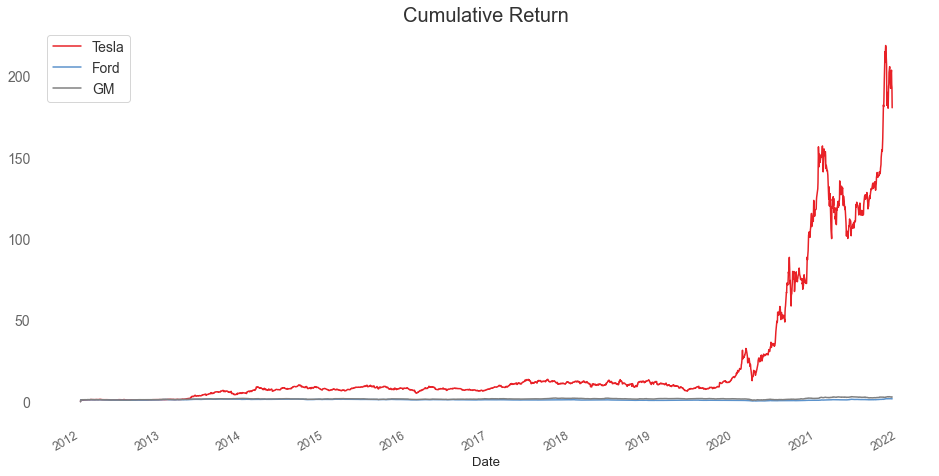

In [108]:
tsla['Cumulative Return'].plot(label = 'Tesla', color = tesla_color)
ford['Cumulative Return'].plot(label = 'Ford', color = ford_color)
gm['Cumulative Return'].plot(label = 'GM', color = gm_color)

plt.title('Cumulative Return', size = 20)
plt.legend(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(False)

plt.show()

---

*That is it for this very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!*

---

#### Author: Renan Pereira Bento

[GitHub Profile](https://github.com/renanpbento)

*Thanks for reading this code. I appreciate comments and feedbacks regarding this project.*